In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sep
from astropy.io import fits

In [3]:
from astropy.utils.data import download_file
# Download and cache the Horsehead Nebula FITS image
image_file = download_file('http://data.astropy.org/tutorials/FITS-images/HorseHead.fits', cache=True )
# Open the FITS file
with fits.open(image_file) as hdul:
    data = hdul[0].data

In [4]:
# Convert to float32 with native byte order 
data = data.byteswap()
data = data.view(data.dtype.newbyteorder('='))
data = data.astype(np.float32)
print("Image shape:", data.shape)

Image shape: (893, 891)


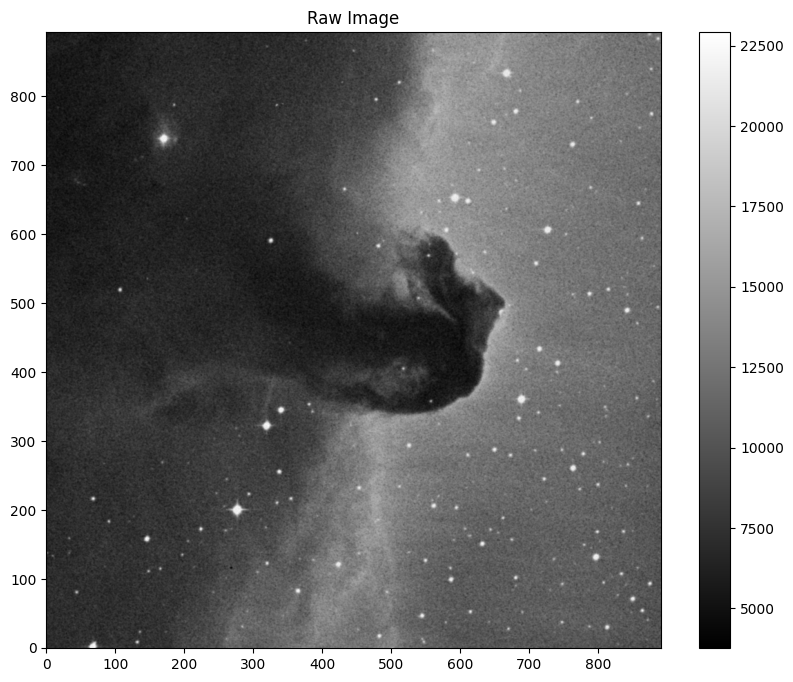

In [32]:
# Save raw image for inspection
plt.figure(figsize=(10, 8))
plt.imshow(data, cmap='gray', origin='lower')
plt.title("Raw Image")
plt.colorbar()
plt.savefig("raw_image.png")
plt.show()

In [33]:
# Estimate and subtract the background
bkg = sep.Background(data)
data_sub = data - bkg.back()

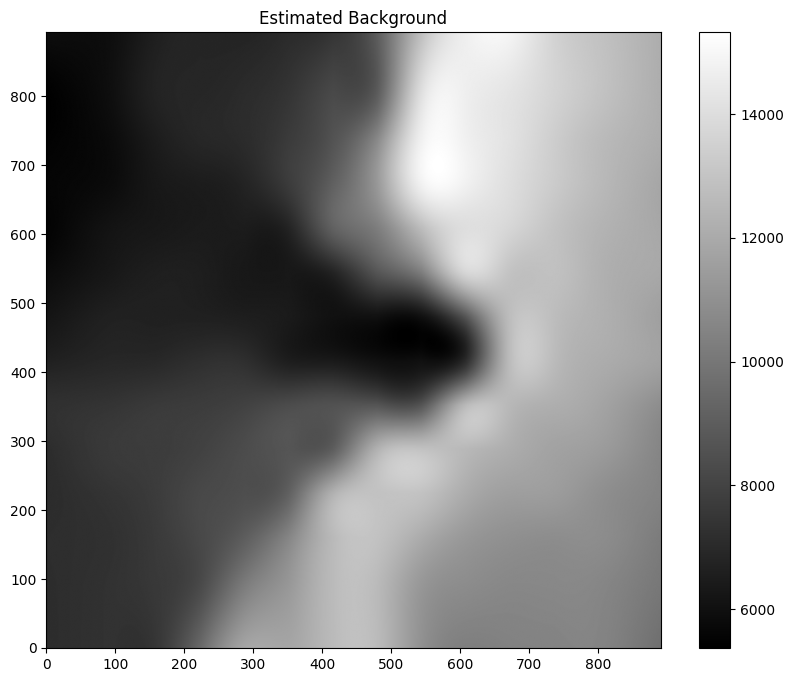

In [34]:
# Display and save the background image
plt.figure(figsize=(10, 8))
plt.imshow(bkg.back(), cmap='gray', origin='lower')
plt.title("Estimated Background")
plt.colorbar()
plt.savefig("background_image.png")
plt.show()

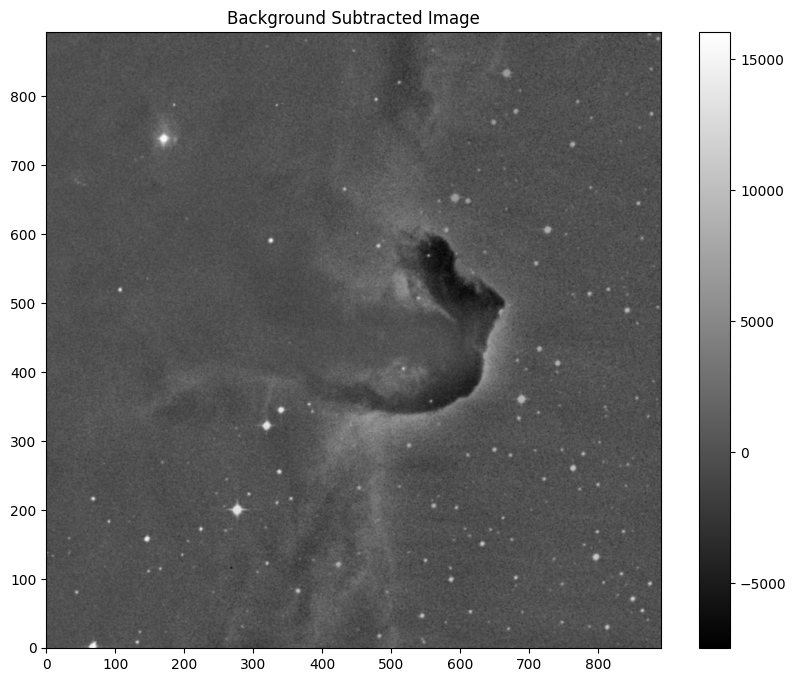

In [35]:
# Save background-subtracted image
plt.figure(figsize=(10, 8))
plt.imshow(data_sub, cmap='gray', origin='lower')
plt.title("Background Subtracted Image")
plt.colorbar()
plt.savefig("background_subtracted.png")
plt.show()

In [36]:
# Extract sources with threshold = 1.5 * background RMS
objects = sep.extract(data_sub, thresh=1.5, err=bkg.globalrms)
print(f"Number of objects detected: {len(objects)}")

Number of objects detected: 570


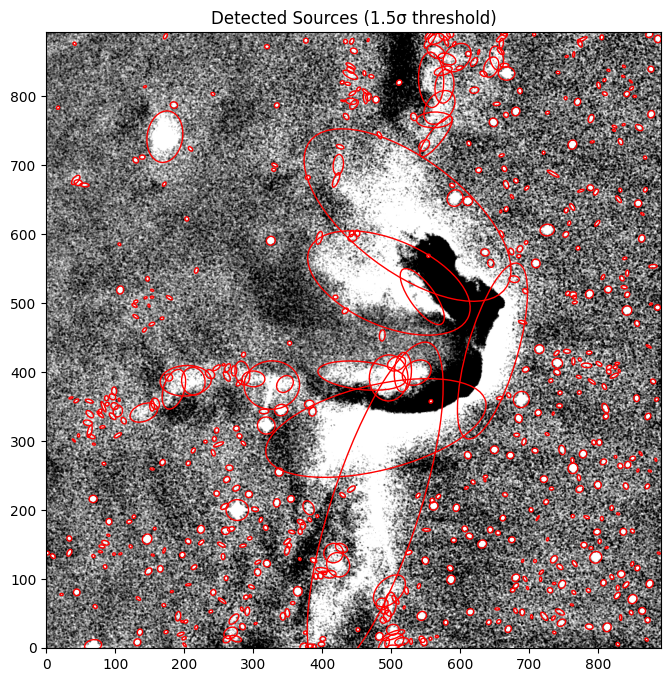

In [37]:
# Plot and save the detected sources as ellipses
fig, ax = plt.subplots(figsize=(10, 8))
m, s = np.mean(data_sub), np.std(data_sub)
ax.imshow(data_sub, cmap='gray', origin='lower', vmin=m-s, vmax=m+s)

for obj in objects:
    e = Ellipse(xy=(obj['x'], obj['y']),
                width=6*obj['a'],
                height=6*obj['b'],
                angle=obj['theta'] * 180. / np.pi,
                edgecolor='red', facecolor='none')
    ax.add_patch(e)

ax.set_title("Detected Sources (1.5σ threshold)")
plt.savefig("detected_sources.png")
plt.show()


In [38]:
# Circular aperture photometry (radius = 3 pixels)
flux, fluxerr, flag = sep.sum_circle(data_sub, objects['x'], objects['y'],
                                     3.0, err=bkg.globalrms)

In [39]:
# Show and save results for first 5 sources
for i in range(min(5, len(objects))):
    print(f"Object {i+1}: x={objects[i]['x']:.1f}, y={objects[i]['y']:.1f}, flux={flux[i]:.2f} ± {fluxerr[i]:.2f}")


Object 1: x=200.2, y=4.5, flux=22362.59 ± 3096.90
Object 2: x=381.3, y=2.6, flux=30093.68 ± 3096.90
Object 3: x=388.0, y=2.3, flux=24568.35 ± 3085.88
Object 4: x=373.1, y=1.8, flux=32905.71 ± 3003.10
Object 5: x=398.7, y=5.4, flux=33032.88 ± 3092.49
